In [154]:
#(a) 수리시간(Minutes) 와 부품의 수(Units) 를 관계시키는 선형 회귀 모형을 적합
setwd('D:/Working/03.Korea/회귀분석/report/Chapter4')

# 2.3 절 데이터
p031_data <- read.table("P031.txt", header = TRUE)
p031reg=lm(Minutes ~ Units, p031_data)

# 문제 4.3 추가 된 데이터
p124_data <- read.table("P124.txt", header = TRUE)
p124reg=lm(Minutes ~ Units, p124_data)
summary(p124reg)


Call:
lm(formula = Minutes ~ Units, data = p124_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.603 -14.801  -0.045  17.335  29.092 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2127     7.9853    4.66  0.00012 ***
Units         9.9695     0.7218   13.81 2.56e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.75 on 22 degrees of freedom
Multiple R-squared:  0.8966,	Adjusted R-squared:  0.8919 
F-statistic: 190.7 on 1 and 22 DF,  p-value: 2.556e-12


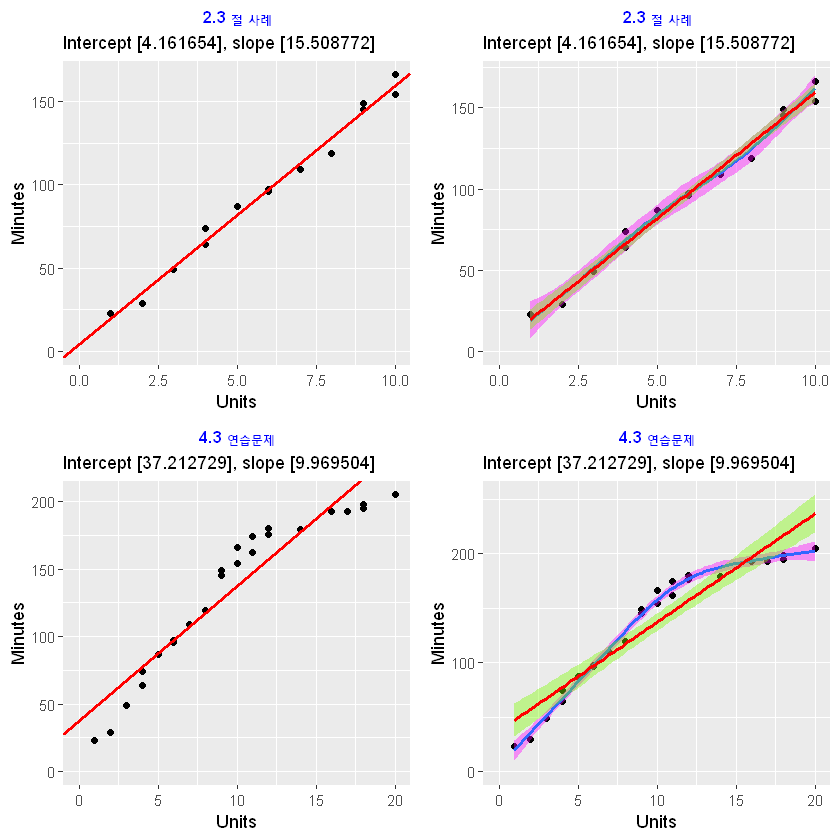

In [152]:
library(ggplot2)
library(gridExtra)

ggplotReg <- function (fit, title, type) {

    p <- ggplot(fit$model, aes_string(x = names(fit$model)[2], y = names(fit$model)[1])) + 
    geom_point() +
    expand_limits(x = 0, y = 0) +
    ggtitle(title)  + # Title 이름 설정 후
    theme(plot.title = element_text(size = 10,
                                    face = "bold",
                                    color = "blue",
                                    hjust = 0.5))# 원하는 테마 입히기.
    if( type == 0 ) {
        p <- p + 
        geom_abline(intercept = fit$coefficients[1],
                        slope = fit$coefficient[2],
                        color = 'red', size = 1)
    } else {
        p <- p + 
        geom_smooth(method = "loess", fill="magenta1") +
        geom_smooth(method = "lm", col = "red", fill = "lawngreen")
    }
    p + 
    labs(subtitle = sprintf("Intercept [%f], slope [%f]",
                           fit$coefficients[1],
                           fit$coefficients[2]))
}

p1 <- ggplotReg(p031reg, '2.3 절 사례', 0)
p2 <- ggplotReg(p031reg, '2.3 절 사례', 1)
p3 <- ggplotReg(p124reg, '4.3 연습문제', 0)
p4 <- ggplotReg(p124reg, '4.3 연습문제', 1)

grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

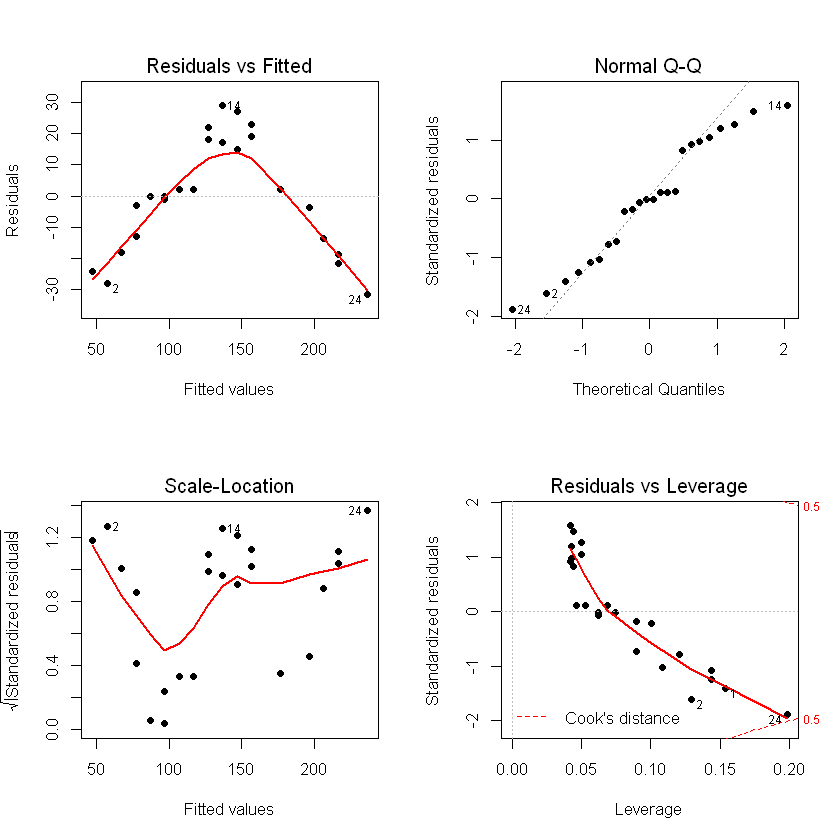

In [165]:
# https://abluesnake.tistory.com/3 
par(mfrow = c(2,2))
plot(p124reg, pch = 16, lwd = 2)

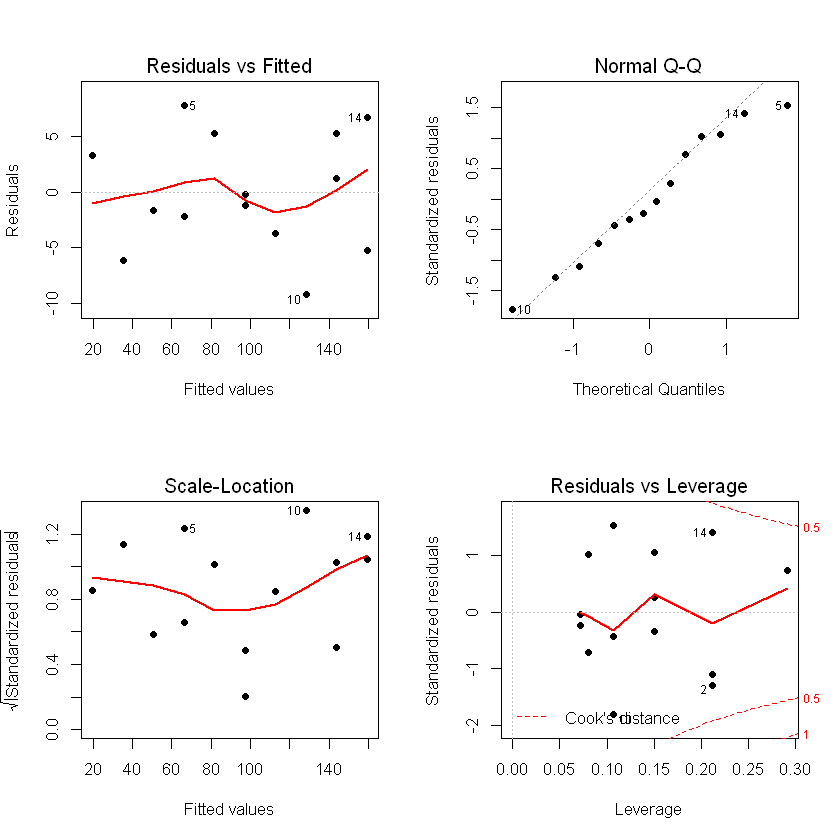

In [166]:
# 2.3 절 데이터 분석.
par(mfrow = c(2,2))
plot(p031reg, pch = 16, lwd = 2)